In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from pythainlp import word_tokenize
from pythainlp.corpus.common import thai_stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import re

from pythainlp.ulmfit import process_thai
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [2]:
# !wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

In [3]:
# !pip install -U --pre matplotlib  
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

In [4]:
url = 'https://www.chadchart.com/policy'
get = requests.get(url)
html = BeautifulSoup(get.text,'html.parser')

blogs=html.find_all('a', attrs={'class':'list-card'})
dict_list=[]
for blog in blogs:
    policy=blog.find('div', attrs={'class':'name'})
    description=blog.find('div', attrs={'class':'description'})
    tags=blog.find_all('span')
    tag_a=''
    for tag in tags:
        # tag_a=(tag.text.strip())+' '+tag_a

        dict_data = {'policy':policy.text.strip(), 'description':description.text.strip(), 'tag':tag.text.strip()}
        dict_list.append(dict_data)

df=pd.DataFrame(dict_list)
df.drop([125], axis=0, inplace=True)

<AxesSubplot:xlabel='policy', ylabel='tag'>

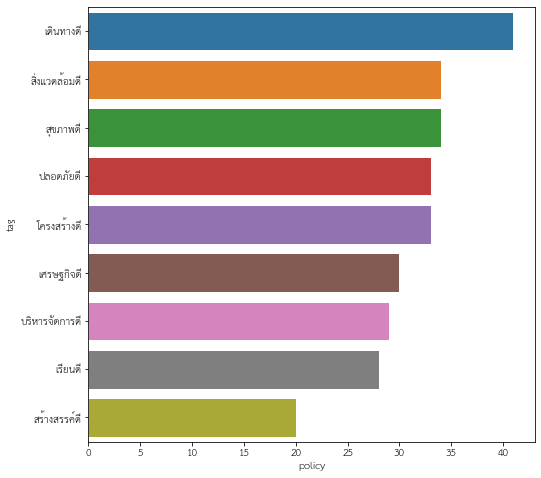

In [5]:
df_tag=df.groupby(by=['tag'],as_index=False)['policy'].agg('count').sort_values(ascending=False, by='policy').head(15)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
sns.set_style("whitegrid")
sns.barplot(data=df_tag, x='policy', y='tag', ax=ax)

In [6]:
url = 'https://www.chadchart.com/policy'
get = requests.get(url)
html = BeautifulSoup(get.text,'html.parser')

blogs=html.find_all('a', attrs={'class':'list-card'})
dict_list=[]
for blog in blogs:
    policy=blog.find('div', attrs={'class':'name'})
    description=blog.find('div', attrs={'class':'description'})
    tags=blog.find_all('span')
    tag_a=''
    for tag in tags:
        tag_a=(tag.text.strip())+' '+tag_a

    dict_data = {'policy':policy.text.strip(), 'description':description.text.strip(), 'tag':tag_a}
    dict_list.append(dict_data)

df_co=pd.DataFrame(dict_list)

In [7]:
tag_list=df.tag.unique()
tag_list

array(['ปลอดภัยดี', 'สร้างสรรค์ดี', 'สิ่งแวดล้อมดี', 'เศรษฐกิจดี',
       'เดินทางดี', 'สุขภาพดี', 'โครงสร้างดี', 'เรียนดี',
       'บริหารจัดการดี'], dtype=object)

In [8]:
df_d=df_co[df_co['tag'] != 'เดินทางดี ']
df_d=df_d[df_d['tag'] != 'ปลอดภัยดี ']
df_d=df_d[df_d['tag'] != 'สิ่งแวดล้อมดี ']
df_d=df_d[df_d['tag'] != 'เศรษฐกิจดี ']
df_d=df_d[df_d['tag'] != 'สุขภาพดี ']
df_d=df_d[df_d['tag'] != 'โครงสร้างดี ']
df_d=df_d[df_d['tag'] != 'เรียนดี ']
df_d=df_d[df_d['tag'] != 'บริหารจัดการดี ']
df_d=df_d[df_d['tag'] != 'สร้างสรรค์ดี ']
df_d

,policy,description,tag
2,เพิ่มรถเมล์สายหลักและรอง ราคาถูกราคาเดียว,Increase bus service in main and minor lines a...,เดินทางดี เศรษฐกิจดี สิ่งแวดล้อมดี
9,จัดทีม 'นักสืบฝุ่น' ศึกษาต้นตอ PM2.5,Setting up a team of ‘Dust Detective’ probing ...,สุขภาพดี สิ่งแวดล้อมดี
10,ตรวจสอบคุณภาพอากาศเชิงรุกในโรงงาน,Actively investigating air quality in factories,สุขภาพดี สิ่งแวดล้อมดี
11,ดำเนินการทางกฎหมายกับผู้ที่ปล่อยมลพิษ,Legal actions against polluters,สุขภาพดี สิ่งแวดล้อมดี
12,สนับสนุนให้เกิด ecosystem รถพลังงานไฟฟ้า,Supporting the electric car ecosystem,เดินทางดี สุขภาพดี สิ่งแวดล้อมดี
...,...,...,...
200,กทม.สร้างแนวทางรับดูแลโครงสร้างพื้นฐาน หมู่บ้า...,ที่อยู่อาศัย,เดินทางดี โครงสร้างดี
202,ผู้ว่าฯ เที่ยงคืน สนับสนุนการใช้ชีวิตและเศรษฐก...,,ปลอดภัยดี บริหารจัดการดี เศรษฐกิจดี
203,แจกอาหาร ก้าวผ่านวิกฤต เปิดครัวกลางที่โรงเรียน...,เศรษฐกิจ,บริหารจัดการดี เศรษฐกิจดี
207,เด็กกทม. เล่นน้ำได้ ว่ายน้ำเป็น,เด็กและเยาวชน,สุขภาพดี ปลอดภัยดี


<AxesSubplot:xlabel='policy', ylabel='tag'>

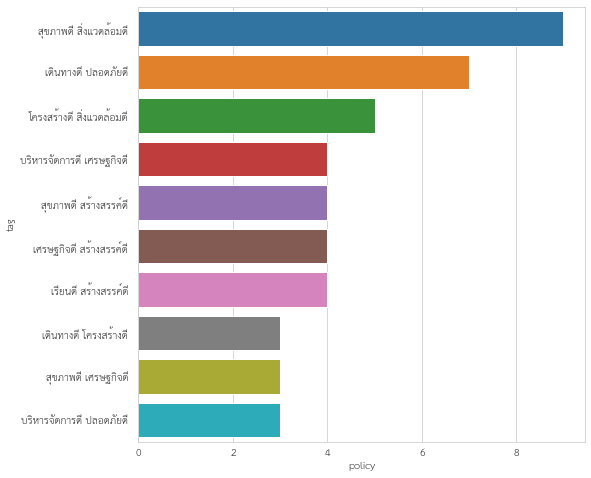

In [9]:
mpl.rc('font', family='TH Sarabun New')
df_tag=df_d.groupby(by=['tag'],as_index=False)['policy'].agg('count').sort_values(ascending=False, by='policy').head(10)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
sns.set_style("whitegrid")
sns.barplot(data=df_tag, x='policy', y='tag', ax=ax)

In [10]:
text = ''
for pol in df['policy']:
    text = text+pol
    
text=re.sub(r'[\([{})\]]','',text)
text=re.sub(r'กรุงเทพฯ','กทม.',text)
text=re.sub(r'BKK','กทม.',text)
words=word_tokenize(text, keep_whitespace=False,engine='newmm')
words=[word for word in words if not word in thai_stopwords()]

word_p=''
for word in words:
    word_p = word_p+' '+word

In [11]:
df_word=pd.DataFrame(words,columns=['word'])
df_word.groupby(by=['word'])['word'].count().sort_values(ascending=False).head(10)

word
กทม.        66
สร้าง       31
พัฒนา       30
พื้นที่     28
ประชาชน     19
ลด          19
ชุมชน       16
สำหรับ      14
ส่งเสริม    14
เขต         14
Name: word, dtype: int64

In [12]:
path = '/content/THSarabunNew.ttf'
regexp = r"[ก-๙a-zA-Z']+"
wordcloud = WordCloud(
                      font_path=path, 
                      relative_scaling = 0.5,
                      min_font_size=1,
                      background_color="black",
                      width=1024,
                      height=768,
                      max_words=1000, 
                      colormap='YlGn', 
                      scale=3,
                      font_step=4,
                    #   contour_width=3, 
                    #   contour_color='steelblue', 
                      collocations=False,
                      regexp=regexp,
                      margin=2
                      ).generate(word_p)

<ipython-input-13-13ac2ae3da88>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


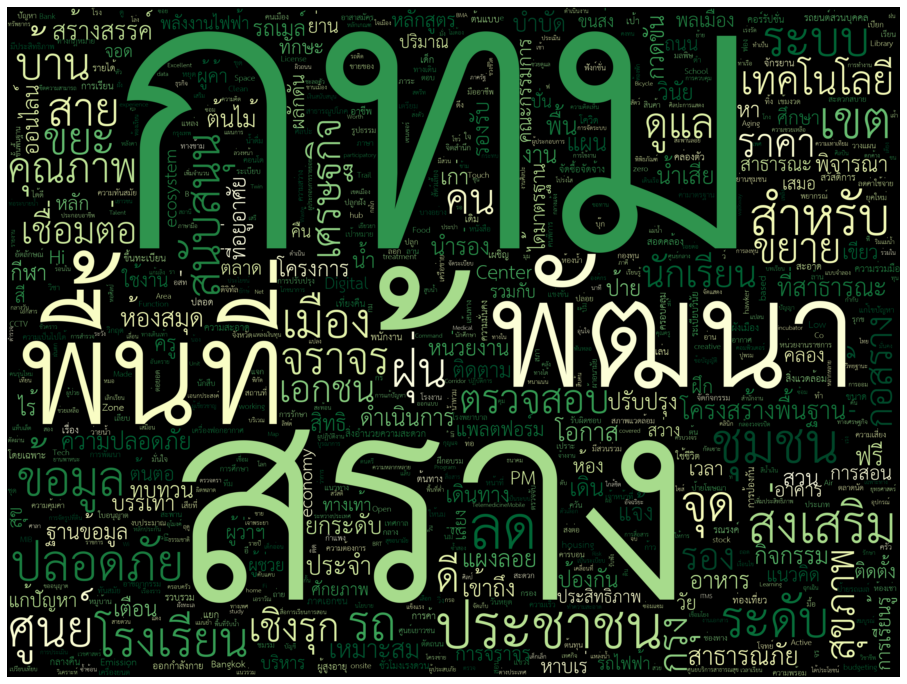

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(16, 16))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
fig.show()